In [1]:
import sys
import aotools
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms
from collections import OrderedDict

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

sys.path.insert(0, '../')
from model_inception import Net
from load import load
from train import train
from utils import *
from dataset import *
import monitoring

In [2]:
model = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#if torch.cuda.device_count() > 1:
    #model = nn.DataParallel(model)
model.to(device)
    
# Load weights
'''
model_dir = 'model-Copy1.pth'
state_dict = torch.load(model_dir)
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove module.
    new_state_dict[name] = v
model.load_state_dict(state_dict)
'''
#print(model)    
    
# Test
#x = torch.randn(2, 2, 128, 128).cuda()
#output, _ = model(x)
#print(output.shape)
#print(_.shape)

"\nmodel_dir = 'model-Copy1.pth'\nstate_dict = torch.load(model_dir)\nnew_state_dict = OrderedDict()\nfor k, v in state_dict.items():\n    name = k[7:] # remove module.\n    new_state_dict[name] = v\nmodel.load_state_dict(state_dict)\n"

In [ ]:
# Data set
data_dir = '../dataset/dataset2/'
dataset_size = 100000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

#monitor = monitoring.monitoringGPU(120)
    
criterion = nn.MSELoss()
new_params = list(model.parameters())
new_params = new_params[:len(new_params)-6]

#optimizer = optim.RMSprop([
#                {'params': new_params},
#                {'params': model.module.resnet.fc.parameters(), 'lr': 1e-3}
#            ], lr=1e-4)

optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, nesterov=True)

#optimizer = optim.Adam(model.parameters(), lr=1e-5)

train(
              model, 
              dataset, 
              optimizer, 
              criterion,
              split = [0.95, 0.05],
              batch_size = 64,
              n_epochs = 300,
              random_seed = 42,
              model_dir = './',
              visdom = True,
)


#monitor.stop()

Visdom successfully connected to server
------------------------------
[1/300] train loss: 16335.288745
[1/300] val loss: 3984.263830
[1/300] Time: 755.673181 s
------------------------------
[2/300] train loss: 3524.718120
[2/300] val loss: 5114.795319
[2/300] Time: 757.495811 s
------------------------------
[3/300] train loss: 3163.702447
[3/300] val loss: 2778.985804
[3/300] Time: 758.195739 s
------------------------------
[4/300] train loss: 2870.095176
[4/300] val loss: 3459.940230
[4/300] Time: 762.677203 s
------------------------------
[5/300] train loss: 2679.562873
[5/300] val loss: 1873.294046
[5/300] Time: 757.945360 s
------------------------------
[6/300] train loss: 2550.452010
[6/300] val loss: 2300.524332
[6/300] Time: 762.374897 s
------------------------------
[7/300] train loss: 2400.404790
[7/300] val loss: 1216.388900
[7/300] Time: 758.392165 s
------------------------------
[8/300] train loss: 2304.599346
[8/300] val loss: 914.881206
[8/300] Time: 758.270087 s


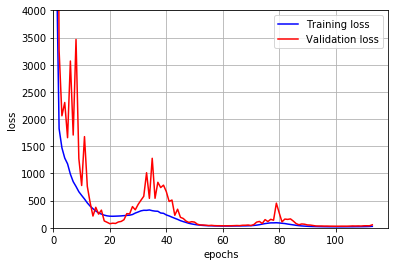

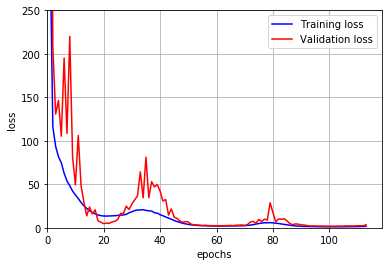

In [3]:
metrics = get_metrics(model_dir='./')
plot_learningcurve(metrics, name='lrcurve.pdf', ylim=[0,4000], xlim=[0,None])
plot_learningcurve(metrics, zernike=True, name='lrcurve_zernike.pdf', ylim=[0,250], xlim=[0,None])